<h3>1. Import module yang dibutuhkan</h3>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

<h3>2. Load Dataset</h3>

In [2]:
imagePaths = 'dataset\\animal_elw\\'
label_list = ['elephant', 'lion']
data = []
labels = []

In [3]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'\\*.jpg'):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

In [4]:
np.array(data).shape

(200, 32, 32, 3)

<h3>3. Data Preprocessing</h3>

In [5]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [6]:
print(labels)

['elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'elephant'
 'elephant' 'elephant' 'elephant' 'elephant' 'elephant' 'eleph

In [7]:
# ubah nilai dari labels menjadi binary
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


<h3>4. Split Dataset</h3>

In [8]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [9]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (160, 32, 32, 3)
Ukuran data test = (40, 32, 32, 3)


<h3>5. Build ANN Architecture</h3>

In [22]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1025      
Total params: 4,197,377
Trainable params: 4,197,377
Non-trainable params: 0
_________________________________________________________________


In [24]:
# tentukan hyperparameter
lr = 0.01
max_epochs = 100
opt_funct = SGD(learning_rate=lr)

In [25]:
# compile arsitektur yang telah dibuat
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

<h3>6. Train Model</h3>

In [26]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/100
5/5 [==============================] - 1s 108ms/step - loss: 0.8005 - accuracy: 0.4462 - val_loss: 0.6603 - val_accuracy: 0.6750
Epoch 2/100
5/5 [==============================] - 0s 58ms/step - loss: 0.6565 - accuracy: 0.7293 - val_loss: 0.6114 - val_accuracy: 0.7750
Epoch 3/100
5/5 [==============================] - 0s 61ms/step - loss: 0.6046 - accuracy: 0.7095 - val_loss: 0.5829 - val_accuracy: 0.7750
Epoch 4/100
5/5 [==============================] - 0s 56ms/step - loss: 0.5781 - accuracy: 0.7148 - val_loss: 0.5709 - val_accuracy: 0.7750
Epoch 5/100
5/5 [==============================] - 0s 70ms/step - loss: 0.5571 - accuracy: 0.7809 - val_loss: 0.5882 - val_accuracy: 0.5500
Epoch 6/100
5/5 [==============================] - 0s 57ms/step - loss: 0.6185 - accuracy: 0.6077 - val_loss: 0.5712 - val_accuracy: 0.7250
Epoch 7/100
5/5 [==============================] - 0s 58ms/step - loss: 0.5120 - accuracy: 0.8251 - val_loss: 0.5709 - val_accuracy: 0.7250
Epoch 8/100
5/5 [==

5/5 [==============================] - 0s 52ms/step - loss: 0.1993 - accuracy: 0.9579 - val_loss: 0.3528 - val_accuracy: 0.8250
Epoch 60/100
5/5 [==============================] - 0s 50ms/step - loss: 0.1816 - accuracy: 0.9589 - val_loss: 0.3553 - val_accuracy: 0.8500
Epoch 61/100
5/5 [==============================] - 0s 49ms/step - loss: 0.1734 - accuracy: 0.9404 - val_loss: 0.3350 - val_accuracy: 0.8250
Epoch 62/100
5/5 [==============================] - 0s 50ms/step - loss: 0.1625 - accuracy: 0.9655 - val_loss: 0.3400 - val_accuracy: 0.8750
Epoch 63/100
5/5 [==============================] - 0s 49ms/step - loss: 0.1874 - accuracy: 0.9291 - val_loss: 0.4120 - val_accuracy: 0.8250
Epoch 64/100
5/5 [==============================] - 0s 51ms/step - loss: 0.2791 - accuracy: 0.8347 - val_loss: 0.3781 - val_accuracy: 0.7750
Epoch 65/100
5/5 [==============================] - 0s 51ms/step - loss: 0.2499 - accuracy: 0.8979 - val_loss: 0.7387 - val_accuracy: 0.6750
Epoch 66/100
5/5 [========

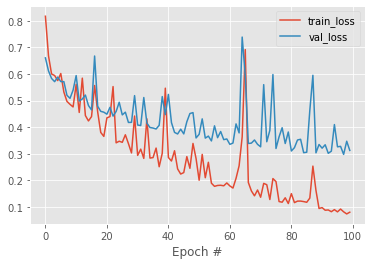

In [27]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
#plt.plot(N, H.history["accuracy"], label="train_acc")
#plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

<h3>7. Evaluate the Model</h3>

In [28]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(np.int)
print(classification_report(y_test, target, target_names=label_list))

              precision    recall  f1-score   support

    elephant       0.89      0.76      0.82        21
        lion       0.77      0.89      0.83        19

    accuracy                           0.82        40
   macro avg       0.83      0.83      0.82        40
weighted avg       0.83      0.82      0.82        40



In [32]:
# uji model menggunakan image lain
queryPath = imagePaths+'query_lion.jpg'
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
print(q_pred)

[[0.6519713]]


In [33]:
if q_pred<=0.5 :
    target = "Elephant"
else :
    target = "Lion"
text = "{}".format(target)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
# menampilkan output image
cv2.imshow('Output', output)
cv2.waitKey() # image tidak akan diclose,sebelum user menekan sembarang tombol
cv2.destroyWindow('Output') # image akan diclose